In [ ]:
#Training Models

2 ways to train a linear regression model


*   Using a direct closed-form equation that computes model parameters that best fit model to training set
*   USing an iterative optimization approach called GD



#Linear Regression

* y = theta0 + theta1x1
    * yhat = htheta(x) = theta * x #Vectorized representation
* Use RMSE as our performance measure, minimize this
  * It's a little easier to use MSE though
     * MSE (X, h) = 1/m np.sum(theta.T * x - y)^2

In [ ]:
#Closed form solution gives us optimized option directly
#Theta = (X.TX)^(-1) * X.T * y

import numpy as np
X = 2 * np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

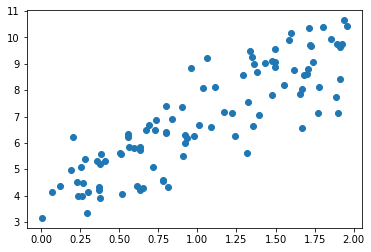

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
#compute theta_hat (the maximized parameters) 
  #we use the inv() fxn from np.linalg to computer inverse of a matrix and the dot() method for matrix mult

X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best
#Not quite the same as the original parameters

array([[3.78940941],
       [3.01756953]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.78940941],
       [9.82454846]])

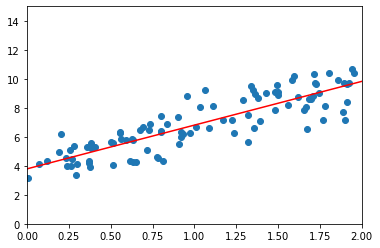

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y)
plt.axis([0,2,0,15]) #x, y
plt.show()

In [ ]:
#linear regression review
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_


(array([3.78940941]), array([[3.01756953]]))

In [ ]:
lin_reg.predict(X_new)

array([[3.78940941],
       [9.82454846]])

In [ ]:
#linear regression in scikit learn uses least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.78940941],
       [3.01756953]])

In [ ]:
#pseudo inverse of X (Moore-Penrose inverse)
#thetahat = X^+ * y
np.linalg.pinv(X_b).dot(y)

array([[3.78940941],
       [3.01756953]])

The pseudoinverse is computed using a standard matrix factorization technique called Singular Value Decomposition(SVD)
* Decomposes training set matrix X into matrix mult. of three matrices

normal equation doesn't work if XTX is not invertible like when if m<n or features redundant but pseudoinverse is always defined

## Computational Complexity

* The normal equation computes inverse X.T X which is (n+1) x (n+1)

Computational complexity is O(n^2.4) to n^3
* aka, doubling the number of features, 5.3 to 8 times tne complexity


On other hand SVD is O(n^2) but both are linear in regard to instances so they handle training data efficiently

making predictions is linear, so once it is trained, doubling features or samples only doubles computation time

#Gradient Descent

In [ ]:
#random initialization then improve it gradually
#learning rate decides size of steps

gradient descent can get caught in local minimums

But linear regression is convex cost function, that means there is always the optimal without ridges

The bowl of the cost function can be elongated when features have different scales

    #converges directly, rather than slowly and first orthogonally and theres a flat valley in the bottom of the bowl

## Batch Gradient Descent

In [ ]:
#We need gradient of cost function with regard to each model parameter

#we need to see how much cost function changes if you change parameters a little bit, aka a partial derivative


#partial deriv of MSE = 2/m np.sum(theta.T * x - y)x_j

#gradient vector of cost function  lets us do it without calculating for each individually
  #delta MSE = (theta0 mse theta, theta1msetheta for each theta individually) = 2/mX.T(X - y)
  #claculations over full training set X at each gradient descent step, hence the batch
    #uses whole batch at every step

In [ ]:
#theta = theta - lr * delta(MSE(theta))

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
thetas = list()


for iteration in range(n_iterations):
  gradients = 2/m * np.dot(X_b.T, X_b.dot(theta) - y)
  thetas.append(theta)
  theta = theta - eta * gradients

theta

array([[3.78940941],
       [3.01756953]])

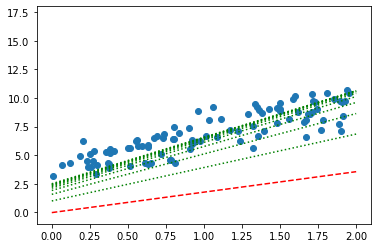

In [ ]:
plt.scatter(X, y)
count = 0

for i in thetas:
  if count < 1:
    xl = np.linspace(0,2, 100)
    yl = i[1]*xl + i[0]
    plt.plot(xl, yl, 'r--')
  
  elif count < 10:
    xl = np.linspace(0,2, 100)
    yl = i[1]*xl + i[0]
    plt.plot(xl, yl, 'g:')

  count += 1


plt.ylim(-1, 18)
plt.show()


## Stochastic Gradient Descent


*   Batch uses whole set at every step which is tough!
*   Only one instance per step with stochastic gradient descent 
* It gets close to the value we want, but because it only trains on one instance, it is not as regular as previous methods
*   Randomness is good for escaping the local minima
*   Steps start out very large but get smaller over time



In [ ]:
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1)
thetas = list()

for epoch in range(n_epochs):
  for i in range(m):
    thetas.append(theta)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[3.74065938],
       [2.94465089]])

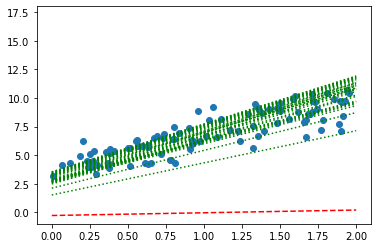

In [ ]:
plt.scatter(X, y)
count = 0

for i in thetas:
  if count < 1:
    xl = np.linspace(0,2, 100)
    yl = i[1]*xl + i[0]
    plt.plot(xl, yl, 'r--')
  
  elif count < 30:
    xl = np.linspace(0,2, 100)
    yl = i[1]*xl + i[0]
    plt.plot(xl, yl, 'g:')

  count += 1


plt.ylim(-1, 18)
plt.show()


#We could do this for every point in the set, first shuffle the data and go through it iteratively at each epoch


For SGD, the instances have to be IID to ensure parameters get pulled towards global optimum on average. --- Just means data has to be shuffled or selected randomly and can't be organized in any way

In [ ]:
#SGD regressor in scikit learn does the SGD linear regression

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7677313]), array([2.99010773]))

## Mini-batch Gradient Descent

* we do small batches on x samples rather than just 1 or all
* performance boost over SGD from hardware being optimized for matrix operations when using GPUs
*We walk closer to minimum compared to stochastic GD but maybe harder to escape minima

All in all
* normal equation is fast but slow on meany features
* SVD is the same and is default scikit learn for linear regression
  * these first two don't require scaling at all
* SGDRegressors:
  * Batch is slow on large ms, but fast with many features
  * SGD is fast on large m and large features and same with mini-batch

# Polynomial Regression

*   List item
*   List item



In [ ]:
#generate non linear data

In [ ]:
import plotly.express as px
import pandas as pd
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

X = [float(x) for x in X]
y = [float(Y) for Y in y]

df = pd.DataFrame()
df['x'] = (X)
df['y'] = (y)

px.scatter(df, x = df.x, y = df.y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

poly_features = PolynomialFeatures(degree = 4, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0]) #this value squared is the new added value using the polynomial features

X_poly[0]

[0.05190303]


array([5.19030336e-02, 2.69392490e-03, 1.39822874e-04, 7.25723134e-06])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93545235]),
 array([[ 1.44775760e+00,  4.61561547e-01, -7.38043954e-02,
         -7.08795987e-04]]))

Plot it

In [ ]:
X_p = np.linspace(start=-3, stop=2.8, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)
y_p = lin_reg.predict(X=X__p)

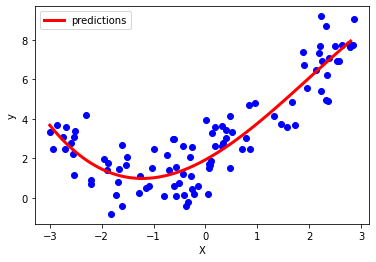

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_p, y_p, color='red', label='predictions', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

## Learning Curves

*   Fitting with too many dimensions might technically perform well, but you are likely to over fit the data at high dimensions
*   Depends on the data!



When your model performs well on training but generalizes poorly on cross-validation metrics, model is probably overfitting

When it performs poorly on both, you are underfitting

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mse(y_train[:m], y_train_predict))
    val_errors.append(mse(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
  plt.ylabel('RMSE')
  plt.xlabel('Training Set Size')
  plt.ylim(top = 4, bottom = 0)

  plt.legend()
  plt.show()

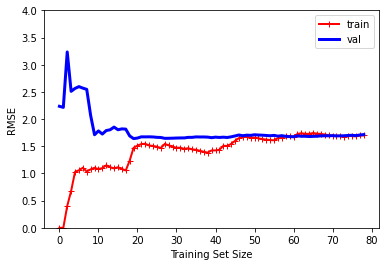

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

As we can see the converged error is extremely high

* First we notice that the training data starts at 0 (as it should since it can find a line for 2 samples easily that fits all of them)
* However we also see a quick plateau at a relatively high error for both sets, indicating to us that there is an underfitting problem

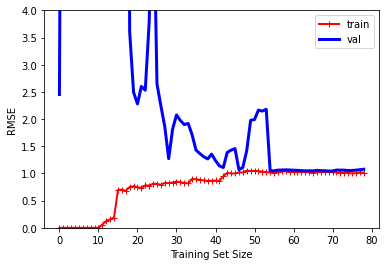

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = True)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In this above example, we see that the error on training data is much lower (about 3x!), but we also see that the validation is substantially higher (~2x)
  * There is a big gap between them unlike the first one!

What this tells us is that this model seems to be overfitting the data, we can deal with this maybe by adding more data
   * More data should bring these lines closer together

High bias likely is underfitting data, while high variance might overfit the data

# Regularized Linear Models

* Regularization can help us prevent overfitting. A simple way is to reduce number of polynomial degrees
* In linear models, regularization is achieved by constraining the weights of the model

## Ridge Regression

Has a regularization term equal to alpha np.sum(theta^2) for theta_i for i to n
   * This term is added to the cost function, when it is 0, we have linear regression. If very large, its just a flat line basically
   * This forces it to keep the weights as small as possible
   * Only added to cost function during training
     * Use the unregularized performance measure for the model performance though

Often we might want to use different functions for cost and for measuring performance

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

poly_features = PolynomialFeatures(degree = 6, include_bias = False)
X_poly = poly_features.fit_transform(X)

#Standard scaling needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_poly)

Cost function of ridge regression

J(theta) = MSE(theta) + alpha * 1/2 np.sum(theta**2)
   * Note that the theta 0, bias term, doesn't get regularized bc sum starts at i = 1 

In [ ]:
from sklearn.linear_model import Ridge
a=.001
alpha_list = [0, .1, 1, 10]



X_orig = [x[0] for x in X]

ridge_reg = Ridge(alpha = a, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict(poly_features.fit_transform([[1.5]]))

array([[8.29590249]])

In [ ]:
ridge_reg.coef_, ridge_reg.intercept_

(array([[ 2.10178215,  1.36709733, -0.416454  ,  0.26875694,  0.25215478,
         -0.26366073]]), array([3.20067064]))

In [ ]:
X_p = np.linspace(start=-1.7, stop=1.7, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)
y_p = ridge_reg.predict(X=X__p)

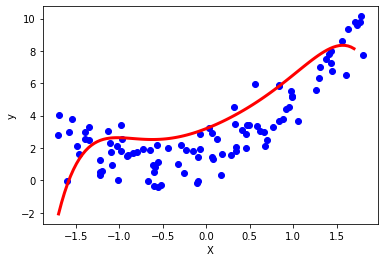

In [ ]:
plt.scatter(X_orig, y, color='blue')
plt.plot(X_p, y_p, color='red', label='predictions', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
# plt.legend(loc='upper left')
plt.show()

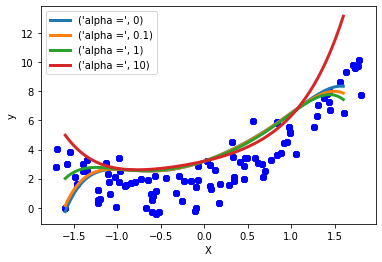

In [ ]:
X_p = np.linspace(start=-1.6, stop=1.6, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)



for alpha in alpha_list:
  X_orig = [x[0] for x in X]
  ridge_reg = Ridge(alpha = alpha, solver = "cholesky")
  ridge_reg.fit(X, y)

  y_p = ridge_reg.predict(X=X__p)

  plt.scatter(X_orig, y, color='blue')
  plt.plot(X_p, y_p, label= ('alpha =', alpha), linewidth=3)


plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Lasso Regression

* Least Absolute Shrinkage and Selection Operator Regression
* Instead we use the l1 norm of weight vector instead of half the square of the l2 norm
    * Cost function = MSE(theta) + alpha np.sum(abs(theta))

* Lasso regresion eliminates weights of least important features
   * We see that alpha produces a sparse model, where there are few nonzero feature weights. Even in a 10 degree model. the results might look quadratic almost

Ridge tends to converge to the optimum while Lasso bounces around it (as if wrapping around the optimum like a lasso, while other is a smooth curve) We can stop the gradeint descent from bouncing arround in lasso by gradually reducing the learning rate

Lasso cost function is not differentiable at theta = 0, but it works with a subrgradient vector

DeltaMSE + alpha (sign(theta), sign(theta)...) where sign(theta) is -1 if less than 0, 0 at 0, and 1 if more than 1

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict(poly_features.fit_transform([[1.5]]))

array([8.8289011])

<ipython-input-41-bbec8c254a69>:9: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+01, tolerance: 6.585e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



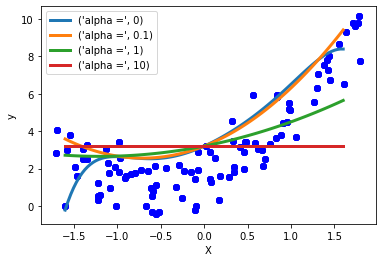

In [ ]:
X_p = np.linspace(start=-1.6, stop=1.6, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)



for alpha in alpha_list:
  X_orig = [x[0] for x in X]
  lasso_reg = Lasso(alpha = alpha)
  lasso_reg.fit(X, y)

  y_p = lasso_reg.predict(X=X__p)

  plt.scatter(X_orig, y, color='blue')
  plt.plot(X_p, y_p, label= ('alpha =', alpha), linewidth=3)


plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Elastic Net

* A middle ground between Ridge Regression and Lasso Regression
* uses a regularization term that's a mix of Ridge and Lasso and we can control the mis ratio r
   * When r=0, Elastic Net is the same as Ridge Regression, and when r = 1, we have lasso regression

* J(theta) = MSE(theta) + r x alpha x np.sum(abs(theta)) + (1-r) / 2 x alpha x np.sum(theta^2)

In general we want to avoid plain linear regression and include some form of regularization

* Ridge is a good default, but if only a few features are likely useful, better to use Lasso or Elastic Net (which is generally preffered) 
    * Lasso struggles when there are many training instances or when several features are strongly correlated

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict(poly_features.fit_transform([[1.5]]))

array([10.16172345])

<ipython-input-45-44803b37cb9e>:9: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.976e+01, tolerance: 6.585e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



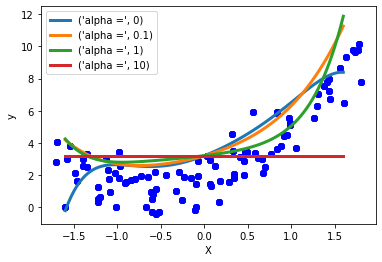

In [ ]:
X_p = np.linspace(start=-1.6, stop=1.6, num=100).reshape(-1, 1)
X__p = poly_features.transform(X_p)



for alpha in alpha_list:
  X_orig = [x[0] for x in X]
  elastic_net = ElasticNet(alpha = alpha, l1_ratio = 0.5)
  elastic_net.fit(X, y)

  y_p = elastic_net.predict(X=X__p)

  plt.scatter(X_orig, y, color='blue')
  plt.plot(X_p, y_p, label= ('alpha =', alpha), linewidth=3)


plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Early Stopping

* Another regularization technique for iterative algorithms like gradient descent is to stop training when validation error reaches a minimum (Early Stopping)
 * Validation error will come to a minimum and start to rise as training continues to decrease, because the model starts to overfit

In [ ]:
#Does not run

from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True,
                       penalty = None, learning_rate = "constant", eta0 = 0.0005) #eta0 is starting learning_rate, we could do early stopping here it looks like as well

min_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < min_val_error:
    min_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)


#Warm_start = True means that the model trains where it left off and doesn't restart from scratch

# Logistic Regression

* cost function of a single instance {-log(phat) if y = 1, -log(1-phat) if y = 0

* log loss for all instances
   * j(theta) = -1/m np.sum(ylog(phat) + (1-y)log(1-p)}
* Convex, so even though we don't have closed form function, we still find the global minimum

Partial derivative of cost function
dJ(theta) = 1/m np.sum(sigmoid(theta.T * x) - y(i)) * x_j
where j is the number of features, so it takes the prediction error times the feature

## Decision Boundaries with logistic regression

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int) # if iris virginica 1, else 0

<ipython-input-47-98114564f4c2>:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X,y)

LogisticRegression()

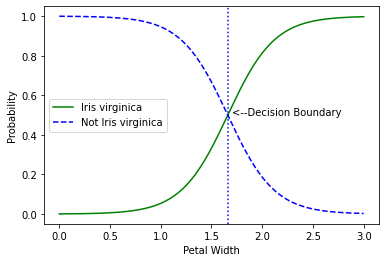

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
plt.axvline(x = 1.66, color = 'b', ls = ':')
plt.annotate('<--Decision Boundary', (1.7, .5))

plt.xlabel('Petal Width')
plt.ylabel('Probability')

plt.legend(loc = 'center left')
plt.show()

Below is graphing two variables between them, with the linear decision boundary of the logistic regression

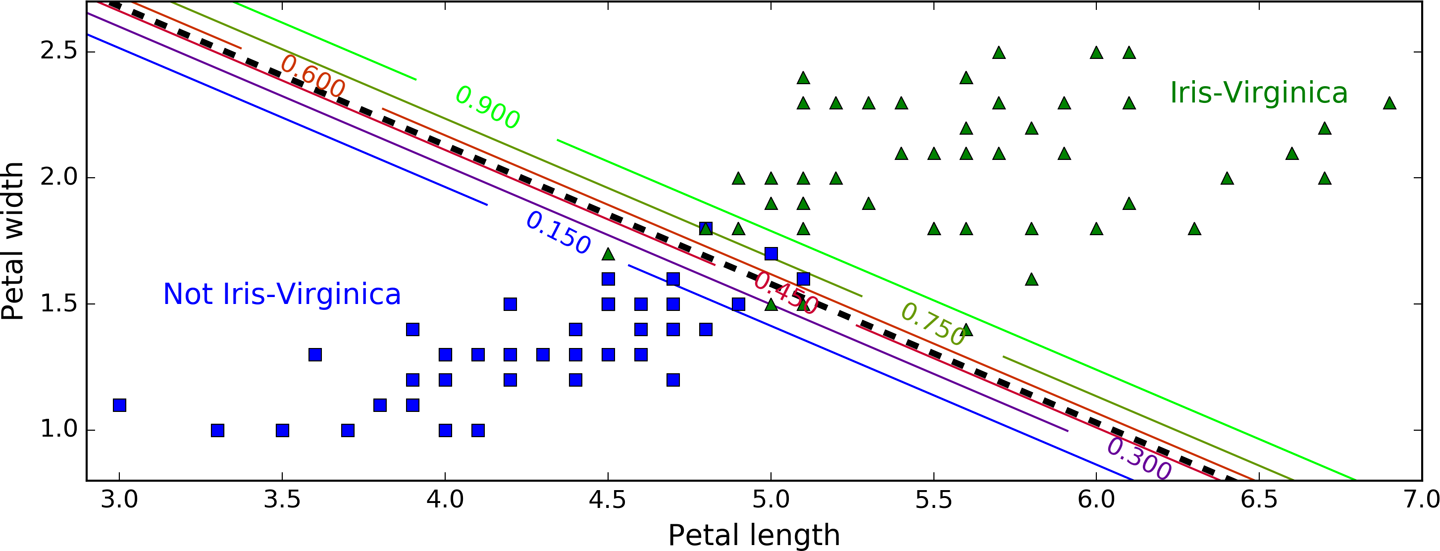

In [ ]:
#By default, sklearn adds an l2 penalty to logistic regression, we use C instead of alpha, which is it's inverse
#Higher values, means it is regularized less

# SoftMax Regression

* LR model can be made to support multiple classes directly without training several multiple binary classifiers
* Softmax regression estimates probability of each class by applying the softmax function(normalized exponential) to the scores

s(x) = x.T . theta (class k)

In [ ]:
#The softmax function is kind of complicated but basically

# exp(s_k(x)) / np.sum from 1 to K (exp(s_j(x)))



yhat = argmax sigmoid(s(x)) = argmax s_k(x) = argmax((theta).Tx)


The cost function we want to minimize is cross entropy which penalizes when probability is low 

J() = -1/m np.sum from 1 to m np.sum from 1 to K(features) (y_k log(p_k))

Same exactly as logistic regression when there are only two classes

Cross entropy gradient vector:
 = 1/m np.sum(p_k - y_k) x

 we use gradient vector for every class and use gradient descent to find parameter matrix theta that minimizes the cost

In [ ]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)   #multi_class technically uses one versus the rest by default

print(softmax_reg.predict([[5,2]]))
softmax_reg.predict_proba([[5,2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])